# Walmart Stock Analysis (2000 - 2024)

In [1]:
# Import library
import pandas as pd
import datetime as dt

In [2]:
# Read the data
data = pd.read_csv("../walmart data/wmt_data.csv")
print(data.head(5))

                        date       open       high        low      close  \
0  2000-01-03 00:00:00-05:00  22.791668  23.000000  21.833332  22.270832   
1  2000-01-04 00:00:00-05:00  21.833332  21.937500  21.395832  21.437500   
2  2000-01-05 00:00:00-05:00  21.291668  21.458332  20.729168  21.000000   
3  2000-01-06 00:00:00-05:00  21.000000  21.520832  20.895832  21.229168   
4  2000-01-07 00:00:00-05:00  21.500000  22.979168  21.500000  22.833332   

   adj_close    volume  
0  14.307388  25109700  
1  13.772032  20235300  
2  13.490974  21056100  
3  13.638196  19633500  
4  14.668746  23930700  


### Cleaning the data

In [3]:
# check for duplicates
if "True" in data.duplicated(): 
    print("Yes")
else:
    print("No")
# there is no duplicate in the data

No


In [4]:
# convert the date into a date format
data["date"] = pd.to_datetime(data["date"], utc=True)

# creating a date column in the format "Y/m/d"
data["new_date"] = data["date"].dt.strftime("%Y/%m/%d")
data["new_date"] = pd.to_datetime(data["new_date"])

# creating columns for the year, month and day
data["year"] = (data["date"].dt.year).astype("int32")
data["month"] = data["date"].dt.month.astype("int32")
data["day"] = data["date"].dt.day.astype("int32")

# creating a date column with a datetime format
# data["new_date"] = pd.to_datetime(data[["year", "month", "day"]])

print(data.tail(5))

                          date       open       high        low      close  \
6340 2025-03-19 04:00:00+00:00  85.949997  86.790001  85.620003  86.330002   
6341 2025-03-20 04:00:00+00:00  85.809998  87.080002  85.519997  85.809998   
6342 2025-03-21 04:00:00+00:00  85.279999  86.230003  84.779999  85.980003   
6343 2025-03-24 04:00:00+00:00  86.470001  87.650002  86.349998  87.489998   
6344 2025-03-25 04:00:00+00:00  86.760002  87.305000  84.620003  84.760002   

      adj_close    volume   new_date  year  month  day  
6340  86.093582  24555900 2025-03-19  2025      3   19  
6341  85.574997  18185500 2025-03-20  2025      3   20  
6342  85.980003  26797200 2025-03-21  2025      3   21  
6343  87.489998  17900700 2025-03-24  2025      3   24  
6344  84.760002  27829607 2025-03-25  2025      3   25  


In [5]:
# Extracting values where year is not 2025 because we only have the first 3 months of 2025 which may distort the data
data = data[(data["year"] != 2025)]

print(data.tail(5))

                          date       open       high        low      close  \
6284 2024-12-24 05:00:00+00:00  90.370003  92.680000  90.349998  92.680000   
6285 2024-12-26 05:00:00+00:00  92.540001  92.879997  92.169998  92.790001   
6286 2024-12-27 05:00:00+00:00  92.129997  92.349998  91.029999  91.660004   
6287 2024-12-30 05:00:00+00:00  90.730003  91.070000  90.129997  90.570000   
6288 2024-12-31 05:00:00+00:00  90.570000  90.940002  90.059998  90.349998   

      adj_close    volume   new_date  year  month  day  
6284  92.426186   8992400 2024-12-24  2024     12   24  
6285  92.535889  10994000 2024-12-26  2024     12   26  
6286  91.408981  11384400 2024-12-27  2024     12   27  
6287  90.321968   9790200 2024-12-30  2024     12   30  
6288  90.102570  11267700 2024-12-31  2024     12   31  


In [6]:
#checking if any of the data in the dataframe has a null/na value
pd.DataFrame.isna(data).any()

date         False
open         False
high         False
low          False
close        False
adj_close    False
volume       False
new_date     False
year         False
month        False
day          False
dtype: bool

####


## QUESTION 1: What is the trend in Walmart stock price from 2000 - 2024

In [7]:
#calculate the mean price of the closing stock and group by year
mean_close_stock = data.groupby("year").mean()["close"]

# checking the day with the maximum stock price close
max_stock = data["close"].max()
for index, row in data.iterrows():
    if row["close"] == max_stock:
        print(f"Maximum closing stock: {row["close"]}" 
              f"\nDate: {row["year"]}/{row["month"]}/{row["day"]}")

Maximum closing stock: 95.6999969482422
Date: 2024/12/6


In [8]:
# checking the year with the max stock price closed
# datetime doesn't support sum operations, so i make use of numerical columns
number_columns = data.select_dtypes(include=["number"]).columns

sum_group = data.groupby("year")[number_columns].sum()
max_sum = sum_group["close"].max()

max_row = sum_group.loc[sum_group["close"] == max_sum]   #fetching the row where closing stock is max

max_year = max_row.index[0]   #The month became the index
print(f"Year with highest total closing prices: {max_year} "
      f"\nHighest total closing prices: {round(max_sum, 6)}")


Year with highest total closing prices: 2024 
Highest total closing prices: 17711.479931


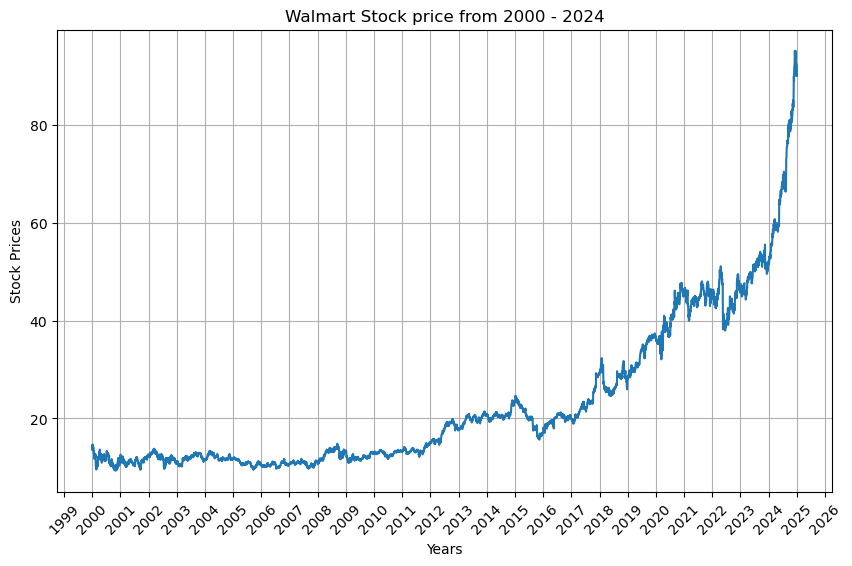

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data["new_date"], data["adj_close"])   # Plot the data
ax.xaxis.set_major_locator(mdates.YearLocator(1))   # Set the locator to show every year, 1 means every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   # Format the ticks to just show the year (YYYY)
plt.xticks(rotation=45)   # Rotate the ticks if they overlap
plt.title("Walmart Stock price from 2000 - 2024")
plt.xlabel("Years")
plt.ylabel("Stock Prices")
plt.grid()
plt.show()
plt.tight_layout()   # Make layout tight so labels don't cut off
plt.show()


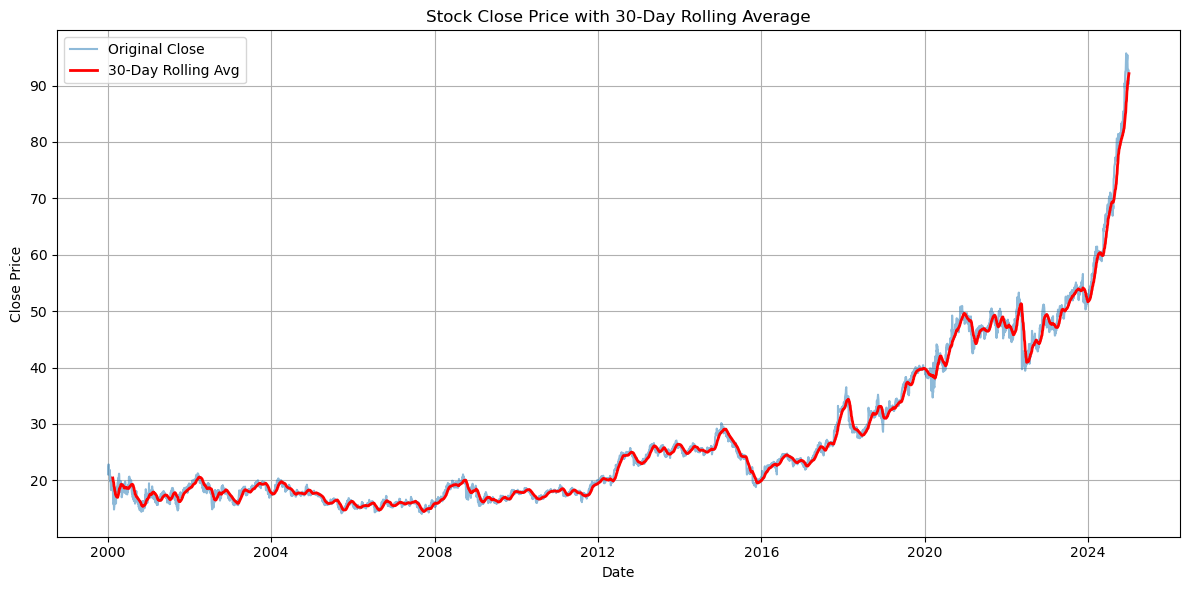

In [10]:
import matplotlib.pyplot as plt

# create a copy of the data
df_rolling = data.copy()

# Apply a 30-day rolling average on 'close' column
df_rolling['rolling_close'] = df_rolling['close'].rolling(window=30).mean()

# Plot original vs. rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_rolling['date'], df_rolling['close'], label='Original Close', alpha=0.5)
plt.plot(df_rolling['date'], df_rolling['rolling_close'], label='30-Day Rolling Avg', color='red', linewidth=2)
plt.title('Stock Close Price with 30-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#####

## QUESTION 2. What are the best and worst performing years for Walmart's stock?

### Best and worst performing years are gotten from the annual returns which are calculated using the adj_close of the last day of each year.

In [11]:
# I make a copy of the original data and call it df_adj
df = data.copy()

# Creating a column for date as formatted_date column using the year, month and date and then indexing the formatted_date the date the index
df.set_index("new_date", inplace=True)   #making the f_date as the index of the dataframe
df["new_year"] = df.index.year   #creating a formatted year column using the index serving as the date 

# The annual returns is calculated using the pct difference in the adj_close price of the last day of each year in succession
annual_returns = df.resample('YE')['adj_close'].last().pct_change() * 100   # "YE" is used instead of "Y" due to future_warning

best_year = annual_returns.idxmax()    # maximum value
worst_year = annual_returns.idxmin()   # minimum value

print(f"Best Performing Year: {best_year.strftime('%Y-%m-%d')} \
      \nWorst Performing Year: {worst_year.strftime('%Y-%m-%d')}")   #converted the full datetime into date, year, day


Best Performing Year: 2024-12-31       
Worst Performing Year: 2015-12-31


Text(0, 0.5, 'Returns (%)')

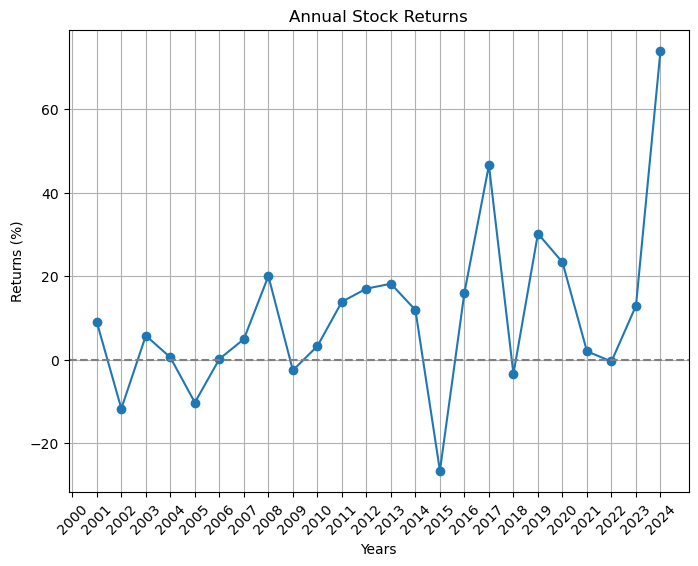

In [12]:
#Plotting a graph to visualise the annual returns
years = [index.year for index, row in annual_returns.items()]   #since the graph can be plotted directly, no use case for this list
all_returns = [value for index, value in annual_returns.items()]
# annual_returns.plot(kind="line", figsize=(8, 6))
plt.figure(figsize=(8, 6))
plt.plot(years, all_returns, marker="o") # marker adds a dot to each datapoint
plt.grid()
plt.xticks(years, rotation=45)
plt.axhline(0, color='gray', linestyle='--')   #demarcating the positive y-axis from the negative y-axis
plt.title("Annual Stock Returns")
plt.xlabel("Years")
plt.ylabel("Returns (%)")

####

## QUESTION 3: How volatile has Walmart Stock been over different decades?

In [13]:
import numpy as np
# A volatile stock is a stock the experiences frequent price changes. The fluctuations is either up or down.
# The volatility is gotten from the standard variation of the closing stock multiplied by the square root of the trading days (usually 252).
# A value of >1 indicates more volatility and lesser indicates less volatility.

# Calculating the percentage returns of the closing stock price
df["returns"] = df["close"].pct_change()

# Calculating the daily standard deviation of returns
daily_volatility = df["returns"].std()

# Calculating the annual volatility
annual_volatility = daily_volatility * np.sqrt(252)

print(f"Daily volatility: {daily_volatility:.4f}")
print(f"Annual volatility: {annual_volatility:.4f}")

# del df_adj["Returns"] this is to delete a column in a dataframe

Daily volatility: 0.0147
Annual volatility: 0.2337


#### Volatility over different decades

In [14]:
# grouping all the years into their respective decades comprising 2000, 2010, and 2020
df["decade"] = (df["new_year"] // 10) * 10   #created a column for decade

decade_volatility = df.groupby("decade")["returns"].std() * 100   #in percentage
decade_volatility = decade_volatility.reset_index()   #reset_index() converts the result into a df
print(decade_volatility)

   decade   returns
0    2000  1.793843
1    2010  1.089567
2    2020  1.422999


<Figure size 800x600 with 0 Axes>

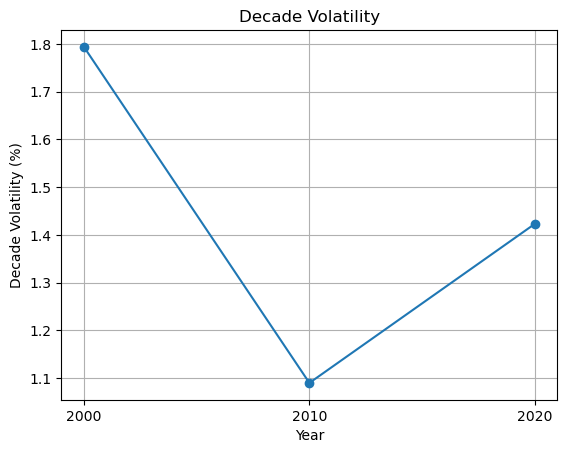

<Figure size 800x600 with 0 Axes>

In [15]:
# plotting the graph of volatility across diferent decades
decades = [decade for decade, df in df.groupby("decade")]   #since the graph can be plotted directly, no use case for this list
# decade_returns = [value for index, value in annual_returns.items()]
plt.plot(decades, decade_volatility["returns"], marker="o")
plt.grid()
plt.xticks(decades)
plt.title("Decade Volatility")
plt.xlabel("Year")
plt.ylabel("Decade Volatility (%)")
plt.figure(figsize=(8, 6))

####

### QUESTION 4.	Were there any major crashes or spikes, and can we relate them to real-world events?

In [16]:
# First, getting the price change per day
df["price_change"] = df["adj_close"].pct_change() * 100

# Getting the absolute of the price_change. Any price above 5% is a significant change. 5% was taken as the base_value. 
sig_change = df[abs(df["price_change"]) > 5]

# Rearranging the columns in a preferred order and resetting the index column. 
sig_change = sig_change[["year", "day", "month", "open", "close", "adj_close", "price_change"]].reset_index(drop=True)
#drop=True ensures the previous index is dropped

# Sorting the df
sig_change = sig_change.sort_values(by="price_change", ascending=False).reset_index(drop=True)

# Top 10 major spikes
print("Top 10 major spikes")
print(sig_change.head(10))

print("\n" * 3)   # Creating blank spaces before the major crashes

# Bottom 10 major crashes
print("Bottom 10 major crashes")
print(sig_change.tail(10))



Top 10 major spikes
   year  day  month       open      close  adj_close  price_change
0  2020   17      3  37.590000  39.753334  36.780537     11.708534
1  2008   28     10  16.980000  18.389999  12.936396     11.073050
2  2017   16     11  31.706667  33.206669  29.261173     10.898391
3  2020   13      3  36.080002  38.033333  35.189156      9.658806
4  2016   19      5  22.700001  23.066668  19.642174      9.580346
5  2018   16      8  33.369999  32.880001  29.655493      9.332773
6  2008   16     10  16.856667  18.206667  12.807434      9.130902
7  2000   27     11  15.645833  16.437500  10.596502      9.128618
8  2001    3      1  17.833332  19.479168  12.573048      8.468721
9  2000    3      4  18.875000  20.395832  13.119324      8.296494




Bottom 10 major crashes
    year  day  month       open      close  adj_close  price_change
75  2022   26      7  40.376667  40.660000  39.147686     -7.604918
76  2008   15     10  17.813334  16.683332  11.735846     -8.063958
77  2023   

In [17]:
# Creating a column for either "spike" or "crash" if the price change is abs(5)
base = 5
df["spike"] = df["price_change"].apply(lambda x: "spike" if x > base else "crash" if x < -base else None)


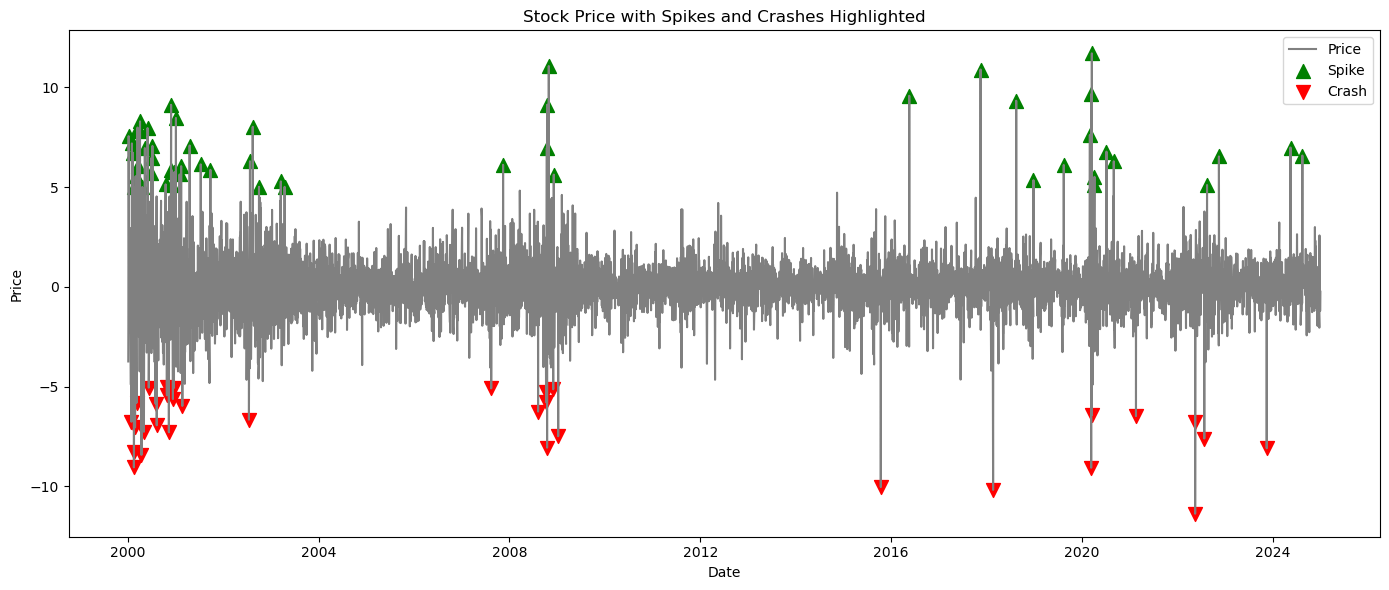

In [18]:
# Plotting the spikes and crashes 
plt.figure(figsize=(14, 6))
#plotting the stock price
plt.plot(df.index, df["price_change"], label="Price", color="gray")

# Plotting spikes
plt.scatter(df.loc[df["spike"] == "spike", "date"],
            df.loc[df["spike"] == "spike", "price_change"],
            color="green", label="Spike", marker="^", s=100)

# Plotting crashes
plt.scatter(df.loc[df["spike"] == "crash", "date"],
            df.loc[df["spike"] == "crash", "price_change"],
            color="red", label="Crash", marker="v", s=100)

plt.title("Stock Price with Spikes and Crashes Highlighted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

###

### QUESTION 5. What are the patterns when aggregating the stock performance by Day of Week and Month?

In [19]:
# Getting the day of week in a new column
df["day_of_week"] = df.index.day_of_week

# Calculating the mean for day of week and also for month by grouping the day of week and month
day_returns_mean = df.groupby("day_of_week")["returns"].mean()
month_returns_mean = df.groupby("month")["returns"].mean()

print(day_returns_mean)
print("\n" * 2)
print(month_returns_mean)

day_of_week
0    0.001015
1    0.001709
2   -0.000332
3    0.000091
4   -0.000798
Name: returns, dtype: float64



month
1    -0.000071
2    -0.000691
3     0.001469
4     0.000341
5    -0.000154
6    -0.000111
7     0.000958
8    -0.000162
9     0.000136
10    0.001099
11    0.001552
12   -0.000524
Name: returns, dtype: float64


####

### QUESTION 6. Does the trading volume correlate with the price movement

In [20]:
# Creating the volume change column
df["volume_change"] = df["volume"].pct_change() * 100

#Getting the correlation
correlation = df[["price_change", "volume_change"]].corr()
print(correlation)

               price_change  volume_change
price_change        1.00000       -0.06294
volume_change      -0.06294        1.00000


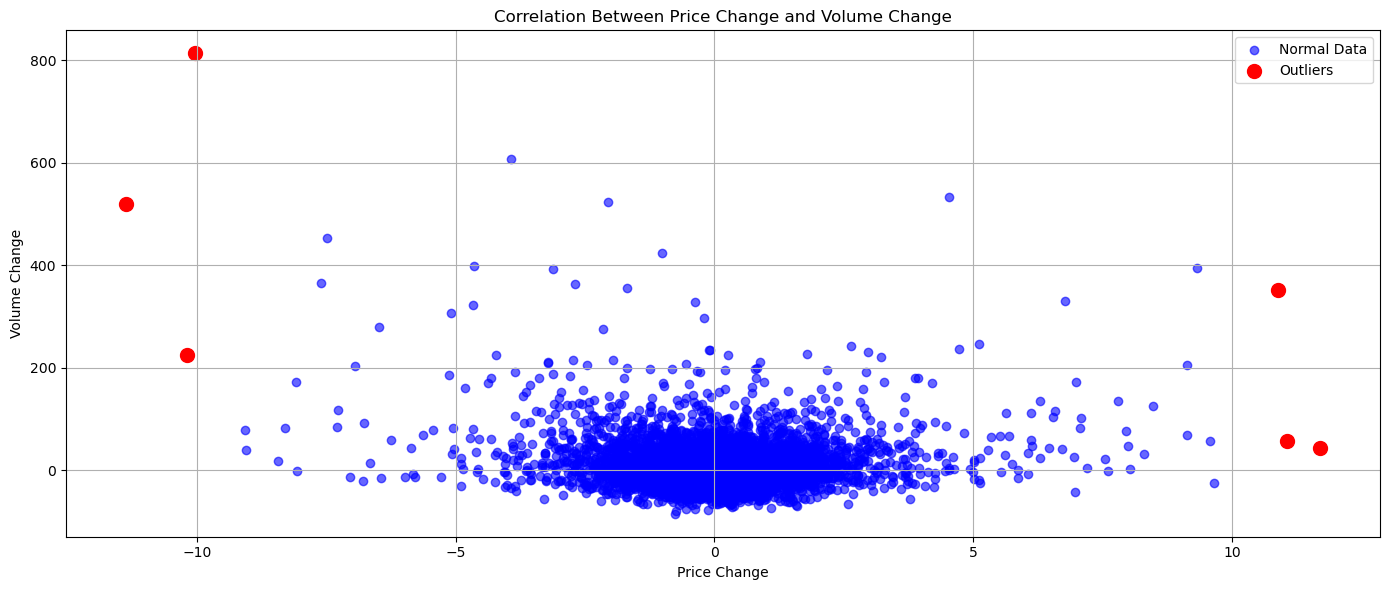

In [21]:
# Creating a plot of the correlation
import matplotlib.pyplot as plt

# Flagging price changes greater than 10 or less than -10 as outliers
df["is_outlier"] = ((df["price_change"] > 10) | (df["price_change"] < -10))

# Plotting a scatter chart of price change and volume change
plt.figure(figsize=(14, 6))

# Scatter plot for all data points
plt.scatter(df["price_change"], df["volume_change"], alpha=0.6, label="Normal Data", color='blue')

# Scatter plot for outliers (price change > 10 or < -10)
plt.scatter(df.loc[df["is_outlier"], "price_change"], 
            df.loc[df["is_outlier"], "volume_change"], 
            color="red", label="Outliers", marker="o", s=100)

# Adding titles and labels
plt.title("Correlation Between Price Change and Volume Change")
plt.xlabel("Price Change")
plt.ylabel("Volume Change")

# Adding a legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

####

### QUESTION 7. What is the cummulative return of Walmart's stock since 2000?

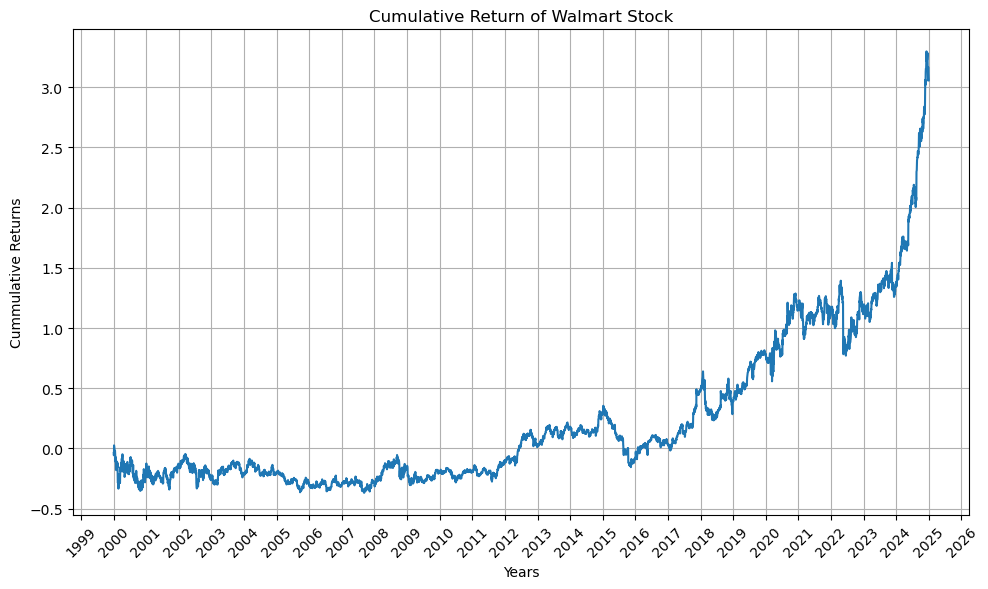

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## The cummulative return is the compounded return over time.
# Creating a cummulative return column.
df["cumulative_return"] = (1 + df["returns"]).cumprod() - 1
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df["cumulative_return"])   # Plot the data
ax.xaxis.set_major_locator(mdates.YearLocator(1))   # Set the locator to show every year, 1 means every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   # Format the ticks to just show the year (YYYY)
plt.xticks(rotation=45)   # Rotate the ticks if they overlap
plt.title("Cumulative Return of Walmart Stock")
plt.xlabel("Years")
plt.ylabel("Cummulative Returns")
plt.grid()
plt.tight_layout()   # Make layout tight so labels don't cut off
plt.show()


###

### END!